# **Churn Prediction for a Telecommunications Company**

Customer churn refers to a percentage of customers that stopped purchasing the goods or service of a company during a period of time [Learn More about Customer Churn](https://mailchimp.com/resources/customer-churn/#:~:text=Customer%20churn%20is%20the%20percentage%20of%20customers%20who,is%20something%20that%20all%20businesses%20want%20to%20avoid.). In our case, we are dealing with a telecommunications company. The goal is to predict customers that will stop using the company's service.

## **Importing the Necessary Libraries**

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## **Data Importation and Cleaning**

In the section, we will be importing our dataset, taking care of missing values, checking if columns have the right data type, creating new columns, dropping unnecessary columns e.t.c

In [69]:
df = pd.read_csv("/workspaces/FLiT-Apprenticeship-Data-Science-Projects/Project_5 Churn-Prediction-Model-with-Deployment/Telecoms Company data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
#getting the shape of our dataset, i.e, the number of rows and columns
df.shape

(7043, 21)

In [71]:
#getting a summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Upon further investigation, we can see that some of our columns have the wrong datatype so we will take care of it as we move further. This should be done to ensure easy data visualization and model building.

Only one column has the wrong data type and that is our `TotalCharges` column. We will take care of it in the following steps:
* We investigate why pandas recognized it as an `object` datatype. This could be because a value was wrongly inputted. Once we figure that out and take care of it;
* We will then convert to the appropriate data type using a function in Pandas called the `astype()` function  

In [72]:
#investigation
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Using the `value_counts()` function, we can see that some of the values in that column are empty spaces. This is why pandas recognized the entire column as object. 

In [73]:
#filling the missing values with zeros
df["TotalCharges"]= df["TotalCharges"].replace(" ", 0)

In [74]:
#following the next step, we can now change the datatype to the appropriate one
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [75]:
#lets recheck our dataframe to confirm the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now that is done, we will move forward to perform further data cleaning and analysis

In [76]:
#checking the unqiue values we have in each column in our data frame
for column in df.columns:
    print(column, ":", df[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


Using a `for loop`, we were able to get the number of unique elements in each of our columns. This will help to perform our
`univariate and bivariate analysis` smoothly.

In [77]:
df.describe() #getting a statistics summary of our dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Inference: from the above:
* Senior Citizen is categorical hence the 25%-50%-75% distribution is not proper
* The average monthly charges is USD 64.76

In [78]:
#copying our data set before further processing
data = df.copy()

The `Tenure` column in our dataset is used to signify how long a customer has been using our company's service. So based on the information, we will be creating a tenure group, i.e., we will be grouping our customers into tenure groups based on how long they have been customers

In [79]:
#creating a function we will apply on our tenure column to create our groups
def tenure_groups(row):
    if row["tenure"] <= 12:
        tenure_group = "1-12"
    elif 12 < row["tenure"] <= 24:
        tenure_group = "13-24"
    elif 24 < row["tenure"] <= 36:
        tenure_group = "25-36"
    elif 36 < row["tenure"] <= 48:
        tenure_group = "37-48"
    elif 48 < row["tenure"] <= 60:
        tenure_group = "49-60"
    else:
        tenure_group = "61-72"
    return tenure_group

In [80]:
data["tenure_groups"] = data.apply(tenure_groups, axis = 1)

In [81]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [82]:
#getting the count of tenure groupd in our dataset
data["tenure_groups"].value_counts()

tenure_groups
1-12     2186
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

## **Data Exploration**

In this section, we will be conducting a variety of analysis to find trends, patterns amongst variables and gain more insight of our dataset.

### **Univariate Analysis**

Univariate analysis involves finding a oattern in a single variable.

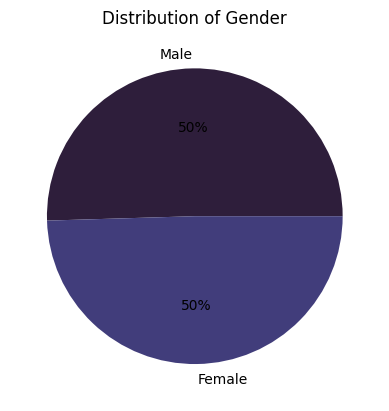

In [83]:
#gender distribution
gender = dict(df.gender.value_counts())
palette = sns.color_palette("mako")
plt.pie(gender.values(), labels = gender.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Gender")
plt.show();

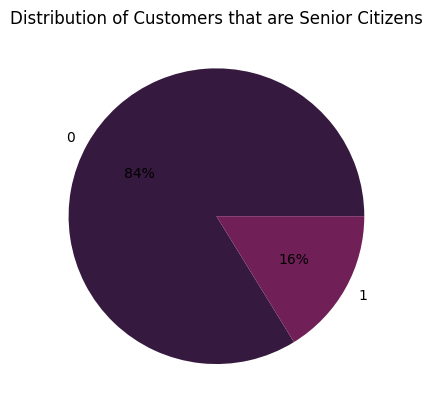

In [84]:
#senior citizen distribution
sen = dict(df["SeniorCitizen"].value_counts())
palette = sns.color_palette("rocket")
plt.pie(sen.values(), labels = sen.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Customers that are Senior Citizens")
plt.show();

From the above visualization we can deduce that majority of the customers are not senior citizens. 

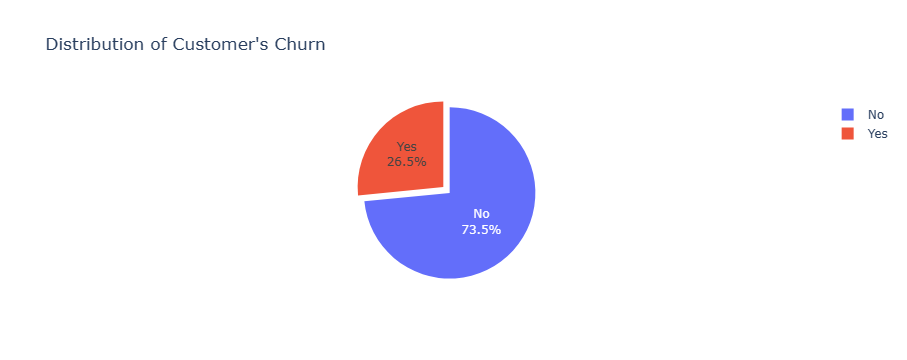

In [85]:
# distribution of our target variable - the churn column
churn = df["Churn"].value_counts().reset_index()
churn.columns = ["Churn", "count"]
fig = px.pie(churn, names = "Churn", values = "count", title = "Distribution of Customer's Churn")
fig.update_traces(textinfo = "percent+label", pull = 0.05)
fig.show();

Inference: From the above, we can conclude that we are dealing with an imbalanced dataset

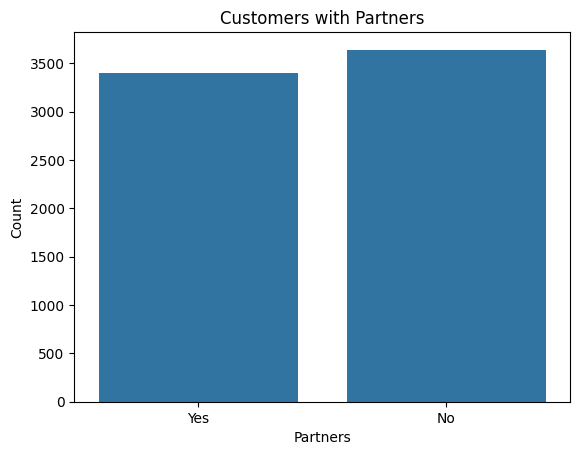

In [86]:
#distribution of customers with partners
sns.countplot(df, x = "Partner")
plt.title("Customers with Partners")
plt.xlabel("Partners")
plt.ylabel("Count");

Text(0, 0.5, 'Count')

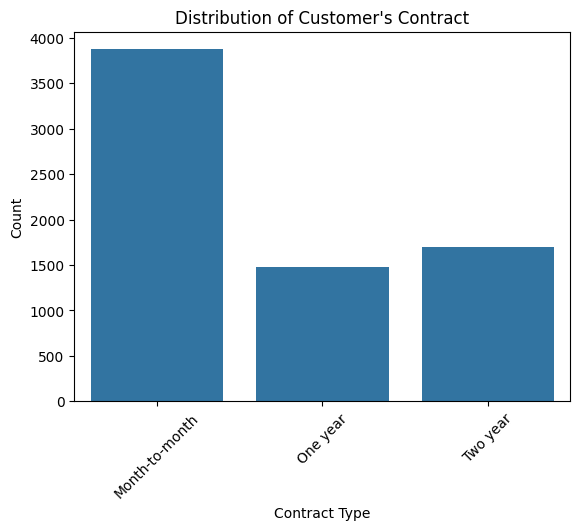

In [87]:
#checking the distribution of customers contract
sns.countplot(df, x = "Contract")
plt.title("Distribution of Customer's Contract")
plt.xlabel("Contract Type")
plt.xticks(rotation = 45)
plt.ylabel("Count")

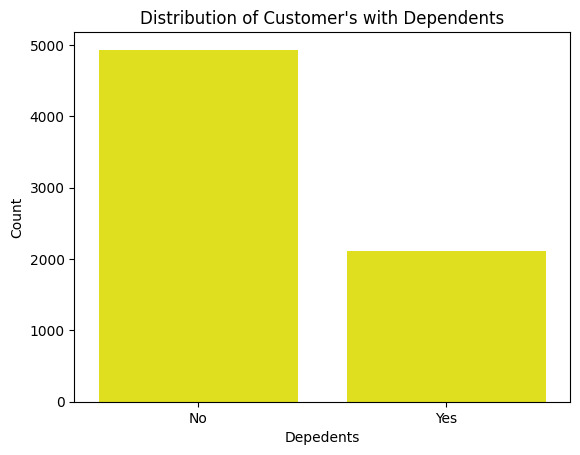

In [88]:
#checking the distribution of customers with dependents
sns.countplot(df, x = "Dependents", color = "yellow")
plt.title("Distribution of Customer's with Dependents")
plt.xlabel("Depedents")
plt.ylabel("Count");

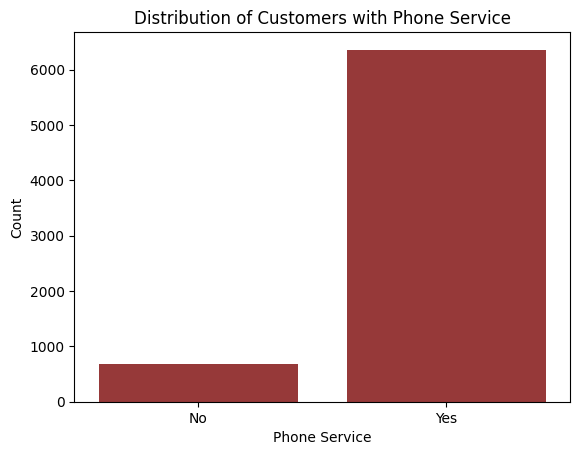

In [89]:
#distribution of customers with phone service
sns.countplot(df, x = "PhoneService", color = "brown")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.title("Distribution of Customers with Phone Service");

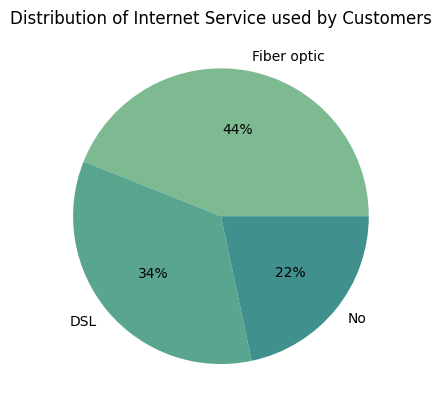

In [90]:
#distribution of internet service type
internet = dict(df["InternetService"].value_counts())
palette = sns.color_palette("crest")
plt.pie(internet.values(), labels = internet.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Internet Service used by Customers")
plt.show();

### **Bivariate Analysis**

Bivariate analysis involves the finding of trends and patterns between two variables[columns] in a dataset

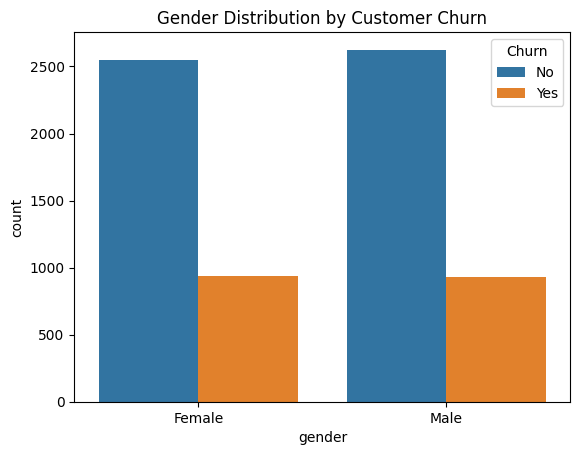

In [91]:
#lets find a relationship between the genders in our dataset aand alos our churn target
sns.countplot(df, x = "gender", hue = "Churn")
plt.title("Gender Distribution by Customer Churn");

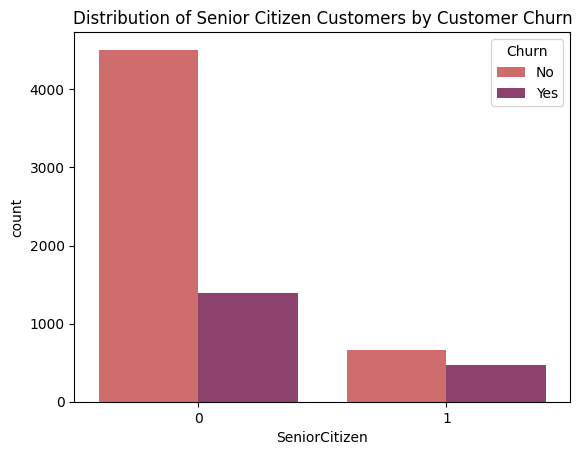

In [92]:
#senior citizen distribution by customer churn
sns.countplot(df, x = "SeniorCitizen", hue = "Churn", palette = "flare")
plt.title("Distribution of Senior Citizen Customers by Customer Churn");

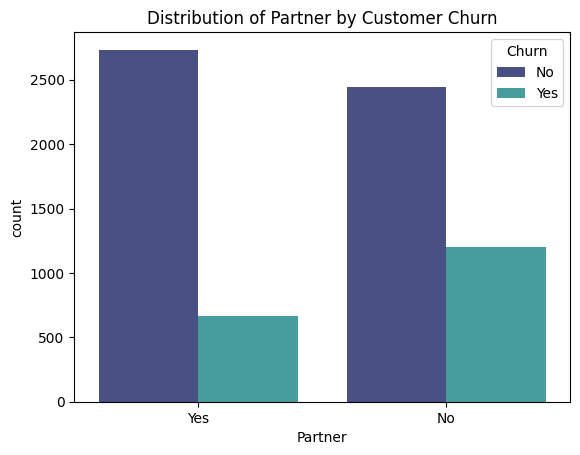

In [93]:
#partner distribution by churn
sns.countplot(data, x = "Partner", hue = "Churn", palette = "mako")
plt.title("Distribution of Partner by Customer Churn");

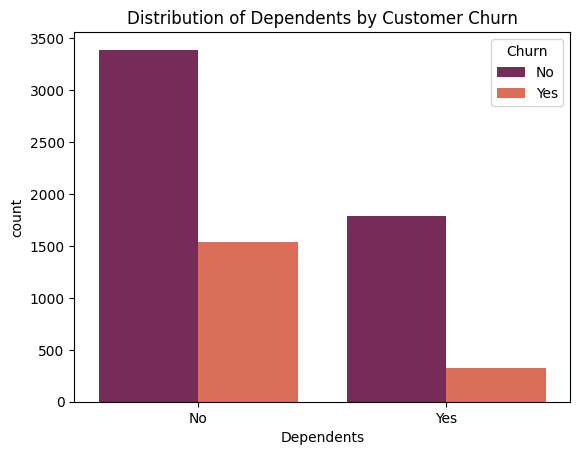

In [94]:
#dependent
sns.countplot(data, x = "Dependents", hue = "Churn", palette = "rocket")
plt.title("Distribution of Dependents by Customer Churn");

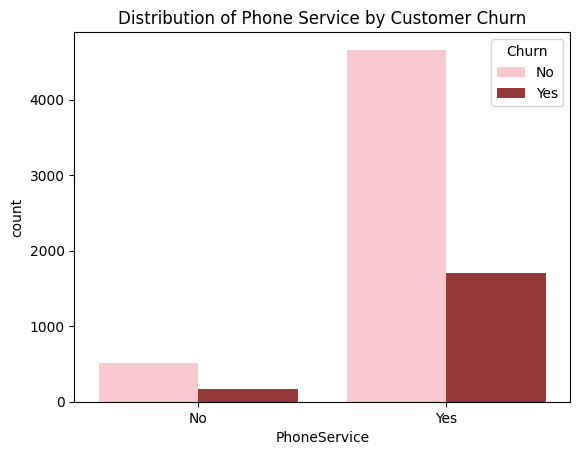

In [95]:
#Phone Service
palette = {"No":"pink", "Yes":"brown"}
sns.countplot(data, x = "PhoneService", hue = "Churn", palette = palette)
plt.title("Distribution of Phone Service by Customer Churn");

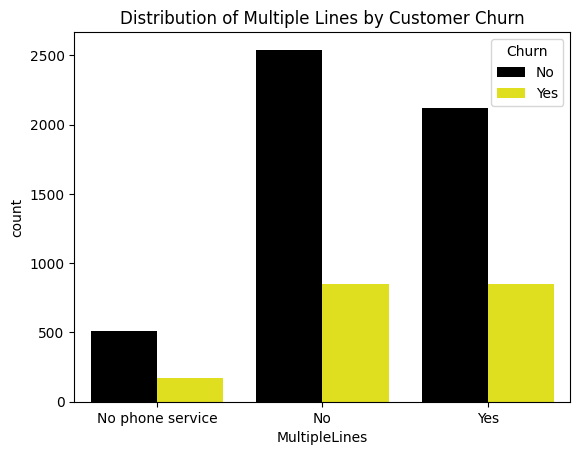

In [96]:
#Phone Service
palette = {"No":"black", "Yes":"yellow"}
sns.countplot(data, x = "MultipleLines", hue = "Churn", palette = palette)
plt.title("Distribution of Multiple Lines by Customer Churn");

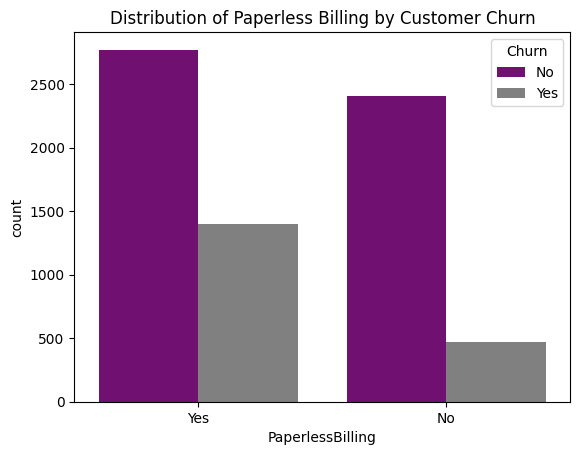

In [97]:
#Paperlessbilling
palette = {"No":"purple", "Yes":"grey"}
sns.countplot(data, x = "PaperlessBilling", hue = "Churn", palette = palette)
plt.title("Distribution of Paperless Billing by Customer Churn");

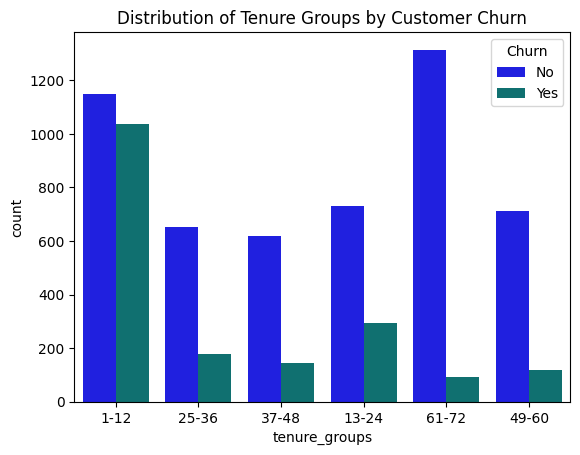

In [98]:
#tenure group
palette = {"No":"blue", "Yes":"teal"}
sns.countplot(data, x = "tenure_groups", hue = "Churn", palette = palette)
plt.title("Distribution of Tenure Groups by Customer Churn");

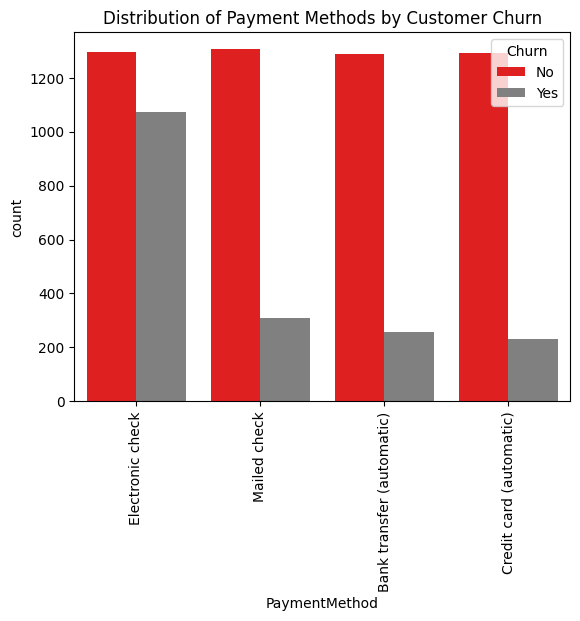

In [99]:
#payment methods
palette = {"No":"red", "Yes":"grey"}
sns.countplot(data, x = "PaymentMethod", hue = "Churn", palette = palette)
plt.xticks(rotation=90)
plt.title("Distribution of Payment Methods by Customer Churn");

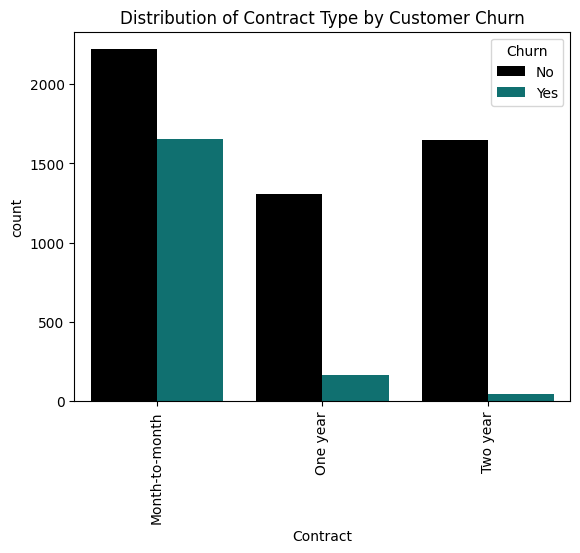

In [100]:
#contract type
palette = {"No":"black", "Yes":"teal"}
sns.countplot(data, x = "Contract", hue = "Churn", palette = palette)
plt.xticks(rotation=90)
plt.title("Distribution of Contract Type by Customer Churn");

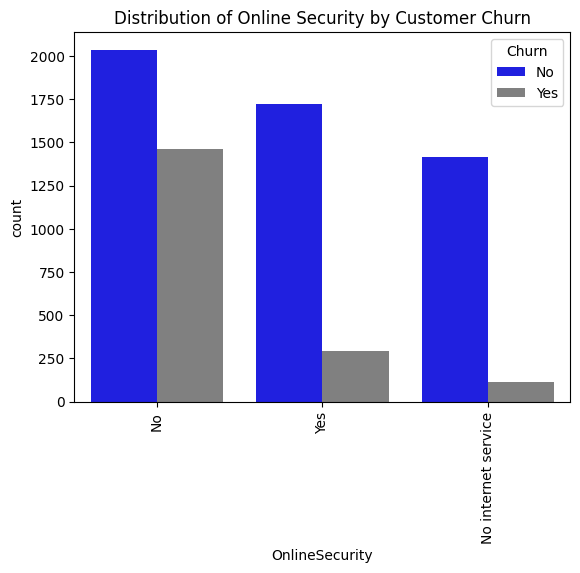

In [101]:
#online security
palette = {"No":"blue", "Yes":"grey"}
sns.countplot(data, x = "OnlineSecurity", hue = "Churn", palette = palette)
plt.xticks(rotation=90)
plt.title("Distribution of Online Security by Customer Churn");

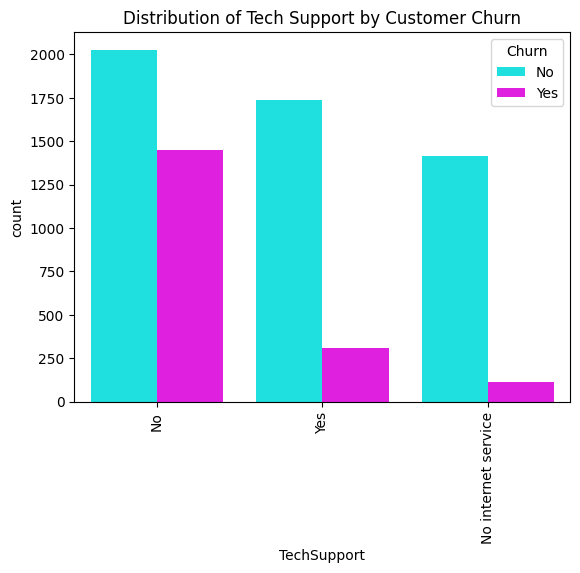

In [102]:
#tech support
palette = {"No":"cyan", "Yes":"magenta"}
sns.countplot(data, x = "TechSupport", hue = "Churn", palette = palette)
plt.xticks(rotation=90)
plt.title("Distribution of Tech Support by Customer Churn");

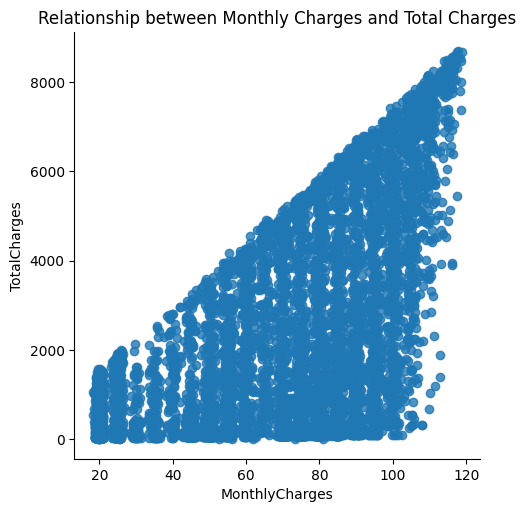

In [103]:
#making a regression plot for our numericla column
sns.lmplot(data, x = "MonthlyCharges", y = "TotalCharges", fit_reg = False)
plt.title("Relationship between Monthly Charges and Total Charges");

**Inference: From the above regression plot we can observe that there is a direct relationship between monthly and total charges. This means that there is a positive correlation between the two variables**

In [104]:
#masking our target variable
mask = {"Yes":1, "No": 0}
data["Churn"] = data["Churn"].map(mask)

Text(0.5, 1.0, 'Monthly charges by churn')

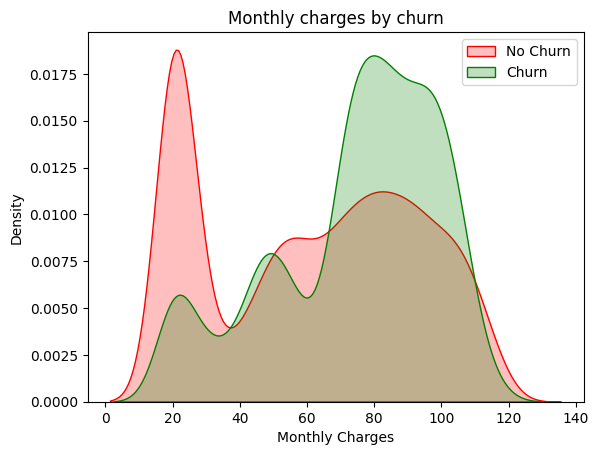

In [105]:
#measuring churn by monthly charges
mth1 = sns.kdeplot(data.MonthlyCharges[(data["Churn"]==0)], color = "red", fill = True)
mth1 = sns.kdeplot(data.MonthlyCharges[(data["Churn"]==1)], color = "green", fill = True)
mth1.legend(["No Churn", "Churn"], loc = "upper right")
mth1.set_ylabel('Density')
mth1.set_xlabel('Monthly Charges')
mth1.set_title('Monthly charges by churn')

**Inference: From the above plot, a high monthly charge leads to a high churn**

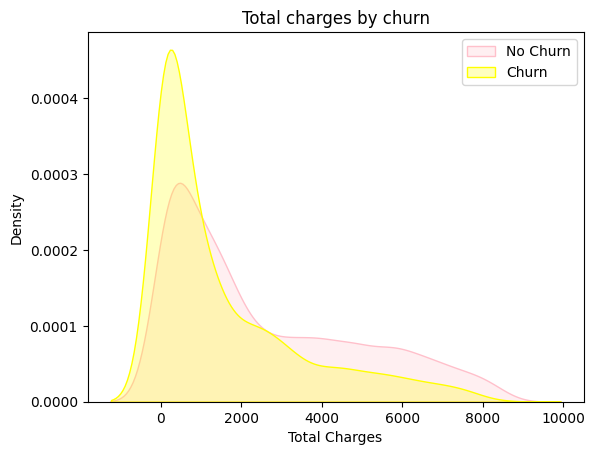

In [106]:
#measuring total charges by churn
thc = sns.kdeplot(data.TotalCharges[(data["Churn"]==0)], color = "pink", fill = True)
thc = sns.kdeplot(data.TotalCharges[(data["Churn"]==1)], color = "yellow", fill = True)
thc.legend(["No Churn", "Churn"], loc = "upper right")
thc.set_ylabel("Density")
thc.set_xlabel("Total Charges")
thc.set_title("Total charges by churn");

**Inference: Here there is a surprising observation showing that when the total charges paid by customers are low, it leads to a high churn**

The following can be drawn from our total visualizations:
* A high monthly charge when the tenure of the customer is low, leads to a low total charge which eventually leads to a high churn. Simply put:
  
  **High Monthly Charge | Low Tenure| Low Total Charge| High Churn**

## **Data Preprocessing and Model Building**

In this section, we will be building our prediction model. We will be building two models: **A machine learning model** and **a deep learning model** We will thencompare teh accuarcy of both models and deploy the best one with the better accuracy. The very first thing we will do is to drop some unnecessary columns and  convert our categorical variables into numerical variables for easy model building.

In [107]:
# dropping unnecessary columns from our dataset
data.drop(columns = ["customerID", "tenure"], axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


Now we will extract our numerical and categorical columns for further preprocessing. For instance, from our data visualizations done in the previous section swe saw that some columns havethree variables when it is meant to be two. For example the column `MulitipleLines` has three variables: `No`, `Yes` and `No phone service`. The `No phone service` means the customer does not have multiple lines. There are a few columns like that so we will change that phrase to `No`.

In [108]:
#numerical columns
num_col = list(data.select_dtypes(include = ['int64', 'float64']).keys())
print(num_col)

['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [109]:
#categorical columns
cat_col = list(data.select_dtypes(include='O').keys())
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_groups']


### **DEEP LEARNING : Data Preprocessing and Model Building**

In this section, we will be using neural networks to predict our churn value.

In [110]:
#copying our dataset before further preprocessing
new_data = data.copy()

In [111]:
# as we see that there is extra categories which we have to convert it into No.
data.MultipleLines = data.MultipleLines.replace('No phone service','No')
data.OnlineSecurity = data.OnlineSecurity.replace('No internet service','No')
data.OnlineBackup = data.OnlineBackup.replace('No internet service','No')
data.DeviceProtection = data.DeviceProtection.replace('No internet service','No')
data.TechSupport = data.TechSupport.replace('No internet service','No')
data.StreamingTV = data.StreamingTV.replace('No internet service','No')
data.StreamingMovies = data.StreamingMovies.replace('No internet service','No')

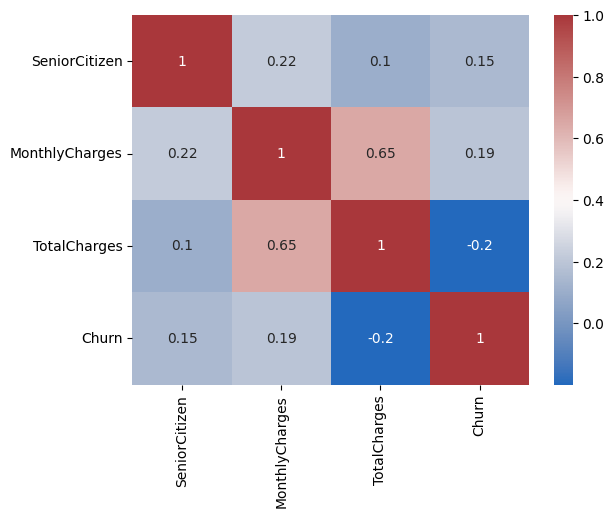

In [112]:
#heatmap of our entire dataset
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = sns.color_palette("vlag", as_cmap=True));

In [113]:
#converting the yes and no in columns to 1 and 0
for i in cat_col:
    data[i] = data[i].replace('Yes',1)
    data[i] = data[i].replace('No',0)

/tmp/ipykernel_1385/3297522840.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [114]:
data.head() #checking the first 5 rows of our dataset

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1-12
1,Male,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25-36
2,Male,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1-12
3,Male,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1-12


In [115]:
#masking our gender column
mask = {"Male":1, "Female": 0}
data["gender"] = data["gender"].map(mask)

We still have some columns not in numerical values so we will use label encoding for that

In [116]:
label = LabelEncoder()
data['InternetService'] = label.fit_transform(data['InternetService'].astype(str))
data['Contract'] = label.fit_transform(data['Contract'])
data['PaymentMethod'] = label.fit_transform(data['PaymentMethod'])

In [117]:
data["tenure_groups"] = label.fit_transform(data["tenure_groups"])

In [118]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


Scaling our numerical columns to ensure uniformity and to ensure fast runtime of our program

In [119]:
scaling = MinMaxScaler()
cols = ["MonthlyCharges", "TotalCharges"]
data[cols] = scaling.fit_transform(data[cols])

In [120]:
#splitting our data into dependent and independent variables
X = data.drop("Churn", axis = 1)
y = data["Churn"]

In [121]:
#splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [122]:
#checking that we have the same shape for our splits
print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


In [123]:
#define our model
model = keras.Sequential([
    keras.layers.Dense(19, input_shape = (19,), activation = "relu"),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    #ouput layer
    keras.layers.Dense(1, activation = "sigmoid")
])

In [124]:
#model compilation
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
#model fitting
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
177/177 [==============================] - 1s 1ms/step - loss: 0.5076 - accuracy: 0.7494
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7847
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7874
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7906
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7925
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.7955
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8001
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7952
Epoch 9/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.7973
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4194 - accura

In [125]:
#prediction
y_pred = model.predict(X_test)
print(y_pred)

45/45 [==============================] - 0s 750us/step
[[0.31213498]
 [0.08004333]
 [0.00258012]
 ...
 [0.02469246]
 [0.02004868]
 [0.48956344]]


In [126]:
#unscaling our y_pred
y_pred_list = []
for i in y_pred:
    if i > 0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

In [127]:
#comparing our actual values with the predicted values
new_table = {"actual_values": y_test, "predicted_values":y_pred_list}
pred_table = pd.DataFrame(new_table)
pred_table.head(10)

,actual_values,predicted_values
185,1,0
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


In [128]:
report = classification_report(y_test, y_pred_list)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1036
           1       0.62      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



Text(70.72222222222221, 0.5, 'True_number')

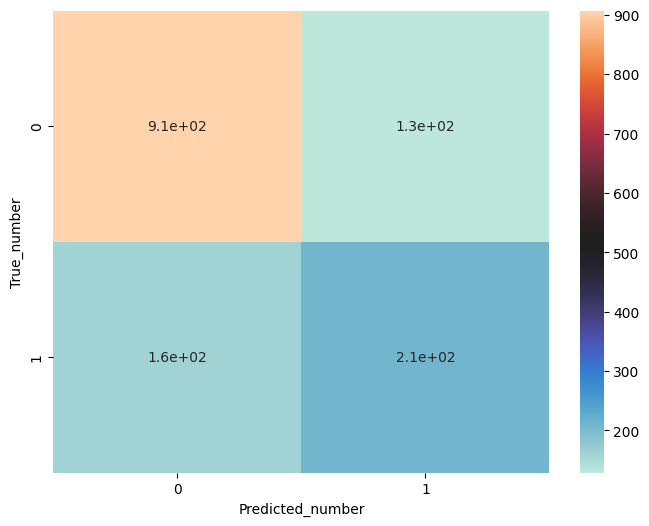

In [129]:
#plotting the confusion matrix
matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_list)
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, cmap = sns.color_palette("icefire", as_cmap=True))
plt.xlabel("Predicted_number")
plt.ylabel("True_number")

### **MACHINE LEARNING: Data Preprocessing and Model building**

In this section we will be using machine learning algorithms to predict our churn value.

In [130]:
data_2 = new_data.copy()

In [131]:
#using our previous data
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [132]:
#encoding our categorical column for easy modeling 
cat = new_data.select_dtypes(include = ["object"]).columns
for column in cat:
    new_data[column] = label.fit_transform(new_data[column])

In [133]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


In [134]:
#using a scaler for our numerical columns
scale = MinMaxScaler()
cols_ = ["MonthlyCharges", "TotalCharges"]
new_data[cols_] = scale.fit_transform(new_data[cols_])

In [135]:
#splitting our dataset
X_2 = new_data.drop("Churn", axis = 1)
y_2 = new_data["Churn"]

In [136]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42) #splitting into test and train dataset

In [137]:
#instantiating our model
rf = RandomForestClassifier()

#fitting our model
rf.fit(X_train_2,y_train_2)

RandomForestClassifier()

In [138]:
#getting predictions
y_predictions = rf.predict(X_test_2)

In [139]:
#evaluating the accuracy of our model
accuracy_ = accuracy_score(y_test_2, y_predictions)
print("Accuracy Score is: ", accuracy_)
print("*"*50)
reports = classification_report(y_test_2, y_predictions)
print(reports)

Accuracy Score is:  0.7899219304471257
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



**From both our deep learning and machine learning models we are getting an accuracy score of about 78% - 79%. It is quite good but not the best. To improve the performance of our machine learning model we will do a bit of hyperparameter tuning and then compare the results and also take care of our imbalanced target data**

### **Model Building with Hyperparameter Tuning**

In [140]:
data_2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [141]:
#splitting into dependent and target variable
X = data_2.drop("Churn", axis = 1)
y = data_2["Churn"]

In [142]:
#getting the categorical and numerical in our dependent variable
num_ = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_ = X.select_dtypes(include = ["object"]).columns.tolist()

In [143]:
#splitting our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [161]:
# Create transformers for encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_),
        ('cat', OneHotEncoder(), cat_),
    ], remainder='passthrough')

In [162]:
categorical_transformer = OneHotEncoder()  
numerical_transformer = StandardScaler()  

In [163]:
# Create a pipeline with preprocessing, SMOTE, and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_),
            ('num', numerical_transformer, num_)
        ]
    )),
    ('classifier', RandomForestClassifier())
])

In [164]:
#fitting on the original data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_groups']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', RandomForestClassifier())])

In [166]:
# hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}


In [167]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}


In [168]:
best_model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_),
            ('num', numerical_transformer, num_)
        ]
    )),
    ('classifier', RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 50, n_jobs = -1))
])

In [169]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_groups']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=50, n_jobs=-1))])

In [170]:
# Evaluate the model on the test set
y_preds_ = best_model.predict(X_test)
acc__ = accuracy_score(y_test, y_preds_)
print("Test Accuracy Score: ", acc__)

Test Accuracy Score:  0.7920511000709723


## **Model Saving for Deployment**